In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import sys, os

# add relevant folders to sys path (only needed for jupyter)
proj_path = Path().cwd().parent
for folder in next(os.walk(proj_path))[1]:
    if '.' not in folder: # ignore hidden folders like .git
        path_to_add = os.path.join(proj_path,folder)
        sys.path.append(path_to_add)

from augment_transaction_data import AugmentTransactionData

In [2]:
atd = AugmentTransactionData(proj_path)
transactions = atd.get_transaction_data()
temp = transactions
temp.head() #not printing for privacy reasons

In [3]:
day = [day[6:] for day in transactions['valuedate'][:].astype(str)]
month = [month[4:6] for month in transactions['valuedate'][:].astype(str)]
year = [year[:4] for year in transactions['valuedate'][:].astype(str)]

In [4]:
temp.drop(columns = ['accountNumber','mutationcode','transactiondate','valuedate'], inplace=True)

In [5]:
temp['day'] = day
temp['month'] = month
temp['year'] = year
# temp['description'] = desc_summary
temp = temp.reindex(['day','month','year','startsaldo','endsaldo','amount','description'], axis=1)

In [6]:
# expenditure and income 
#TODO: 
# add use of description here-- expenses coming in and going to savings should not be counted
# add the funcionality to select the date range based on a given range option

# select time period
month_inp = "08"
year_inp = "2023"

# make conditions
time_cond = (temp['month'] == month_inp) & (temp["year"] == year_inp)
expenses_cond = (temp['amount'] < 0)
income_cond = (temp['amount'] > 0)

# variables to plot
days_exp = temp[time_cond & expenses_cond]["day"]
expenses = np.array(temp[expenses_cond & time_cond]['amount'])
income = np.array(temp[income_cond & time_cond]['amount'])


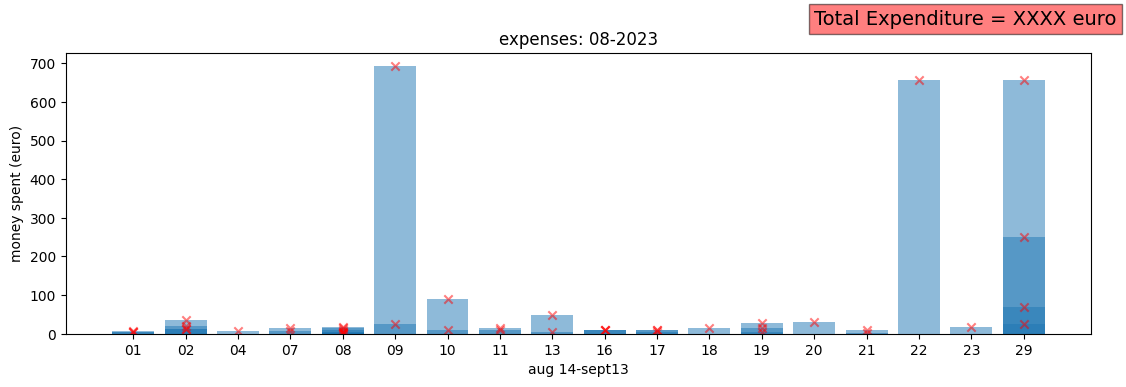

In [8]:
# plotting expenses
plt.figure(figsize=(11.69,4))
plt.bar(days_exp, -expenses, alpha=0.5)
plt.scatter(days_exp,-expenses, marker='x', color='red',alpha=0.5)
plt.title(f'expenses: {month_inp}-{year_inp}')
plt.xlabel('aug 14-sept13')
plt.ylabel('money spent (euro)')

plt.text(13, 800, 'Total Expenditure = XXXX euro', fontsize = 14, 
         bbox = dict(facecolor = 'red', alpha = 0.5)) # in your notebook, replace XXXX with temp['amount'].sum()
plt.tight_layout()
plt.show()
